<a href="https://colab.research.google.com/github/jrTanvirHasan27/Railway-Obstacle-Detections/blob/main/VGG16_Train_Obstacle_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
!unzip "/content/drive/MyDrive/8th Semester/Research/Augmented Dataset.zip" -d "/content/Dataset/"

In [ ]:
!unzip "/content/drive/MyDrive/8th Semester/Research/Augmented- Test.zip" -d "/content/Dataset/"

In [4]:
train_path = '/content/Dataset/Augmented Dataset'
test_path = '/content/Dataset/Augmented- Test/Test'
val_path = '/content/Dataset/Augmented- Test/Validation'

Obstacle


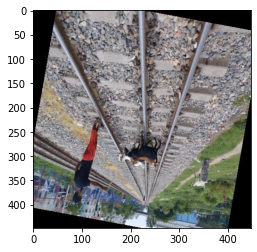

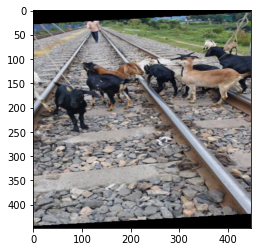

Empty Track


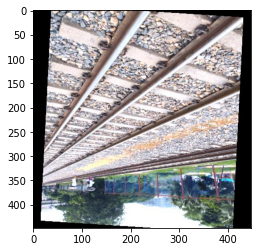

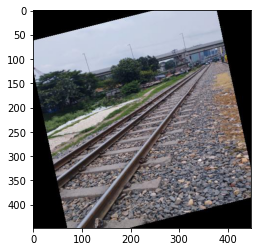

In [5]:
for folder in os.listdir(train_path):
  sub_path = train_path + "/" + folder

  print(folder)
  for i in range(2):
    temp_path = os.listdir(sub_path)[i]
    temp_path = sub_path + "/" + temp_path
    img = mpimg.imread(temp_path)
    implot = plt.imshow(img)
    plt.show()

In [6]:
def imagearray(path, size):
  data = []
  for folder in os.listdir(path):
    sub_path = path + "/" + folder

    for img in os.listdir(sub_path):
      image_path = sub_path + "/" + img
      img_arr = cv2.imread(image_path)
      img_arr = cv2.resize(img_arr, size)
      data.append(img_arr)
  
  return data

In [7]:
size = (320, 320)

In [8]:
%%time
train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

CPU times: user 30.9 s, sys: 1.92 s, total: 32.8 s
Wall time: 26.2 s


In [9]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [10]:
def data_class(data_path, size, class_mode):
  datagen = ImageDataGenerator()
  classes = datagen.flow_from_directory(data_path,
                                        target_size = size,
                                        batch_size = 32,
                                        class_mode = class_mode)
  return classes

In [11]:
train_class = data_class(train_path, size, "sparse")
test_class = data_class(test_path, size, "sparse")
val_class = data_class(val_path, size, "sparse")

Found 3192 images belonging to 2 classes.
Found 1900 images belonging to 2 classes.
Found 1030 images belonging to 2 classes.


In [12]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [13]:
train_class.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [14]:
train_class.class_indices

{'Empty Track': 0, 'Obstacle': 1}

In [15]:
print("Y_Train Shape:", y_train.shape,
      "Y_Test Shape:", y_test.shape,
      "Y_Val Shape:", y_val.shape)

Y_Train Shape: (3192,) Y_Test Shape: (1900,) Y_Val Shape: (1030,)


In [16]:
vgg = VGG16(input_shape = (320,320,3), weights = 'imagenet', include_top = False)

58900480/58889256 [==============================] - 0s 0us/step


In [17]:
for layer in vgg.layers:
  layer.trainable = False


In [18]:
x = Flatten()(vgg.output)
prediction = Dense(3, activation = "softmax")(x)

In [19]:
model = Model(vgg.input, prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 320, 320, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 320, 320, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 320, 320, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 160, 160, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 160, 160, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 160, 160, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 80, 80, 128)       0     

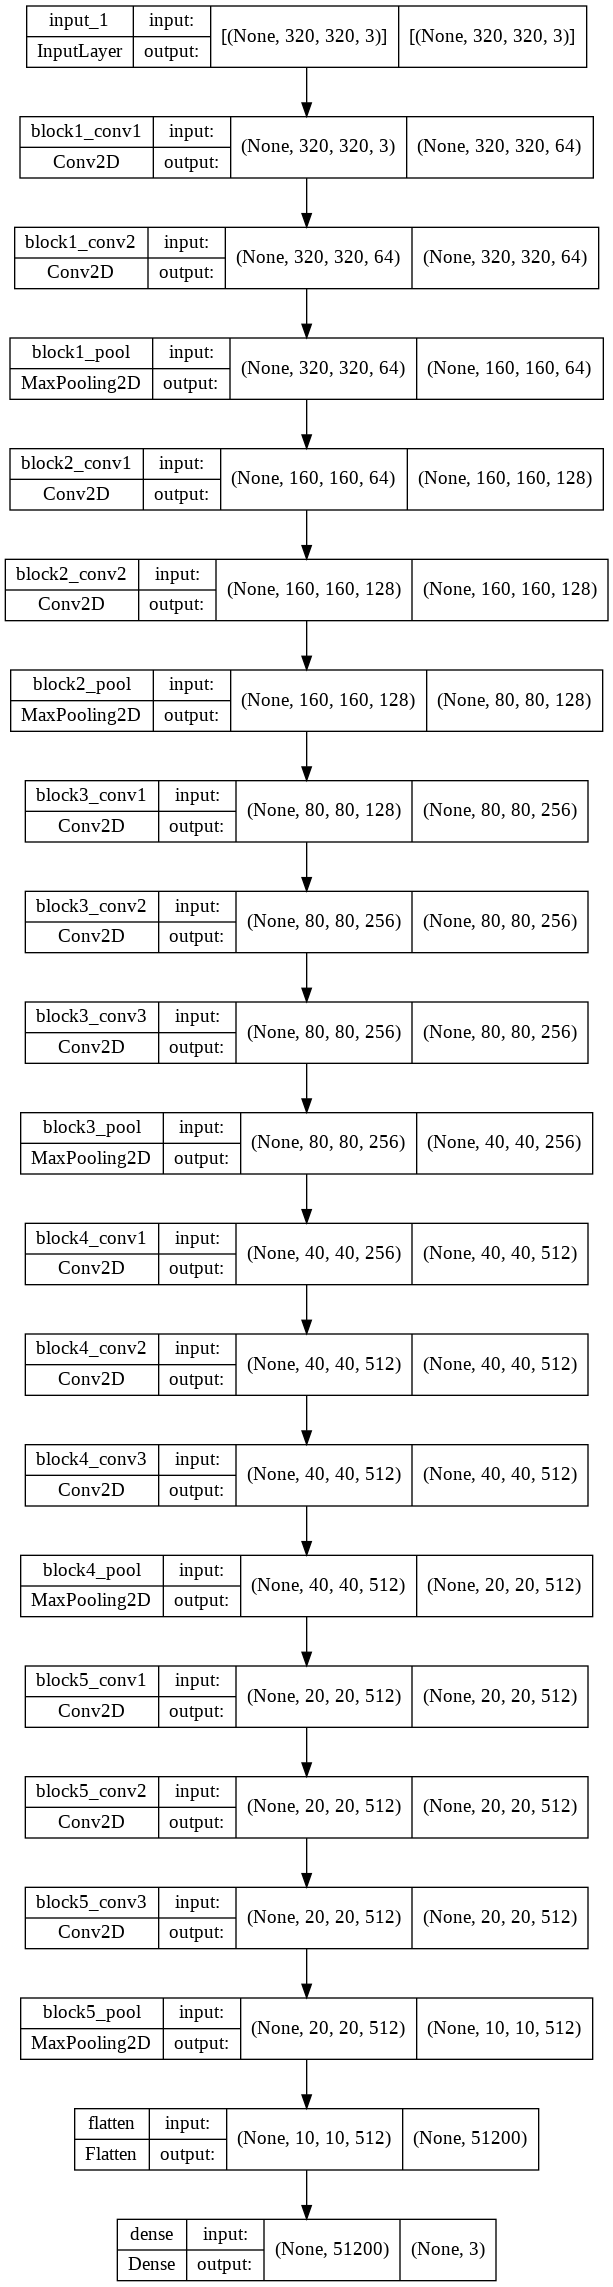

In [20]:
plot_model(model = model, show_shapes = True)

In [21]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = "min", verbose = 1, patience = 5)

In [22]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [23]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 20, callbacks = [early_stop], batch_size =30,
                    shuffle = True)

Epoch 1/20
107/107 [==============================] - 61s 426ms/step - loss: 0.9546 - accuracy: 0.9599 - val_loss: 7.3151 - val_accuracy: 0.9612
Epoch 2/20
107/107 [==============================] - 44s 410ms/step - loss: 0.0484 - accuracy: 0.9972 - val_loss: 7.3808 - val_accuracy: 0.9602
Epoch 3/20
107/107 [==============================] - 43s 401ms/step - loss: 0.0320 - accuracy: 0.9978 - val_loss: 7.2758 - val_accuracy: 0.9592
Epoch 4/20
107/107 [==============================] - 43s 405ms/step - loss: 0.0109 - accuracy: 0.9987 - val_loss: 7.2554 - val_accuracy: 0.9612
Epoch 5/20
107/107 [==============================] - 43s 403ms/step - loss: 0.0236 - accuracy: 0.9984 - val_loss: 7.4075 - val_accuracy: 0.9583
Epoch 6/20
107/107 [==============================] - 43s 403ms/step - loss: 0.2379 - accuracy: 0.9928 - val_loss: 13.7094 - val_accuracy: 0.9612
Epoch 7/20
107/107 [==============================] - 43s 403ms/step - loss: 0.1372 - accuracy: 0.9953 - val_loss: 16.7549 - val_

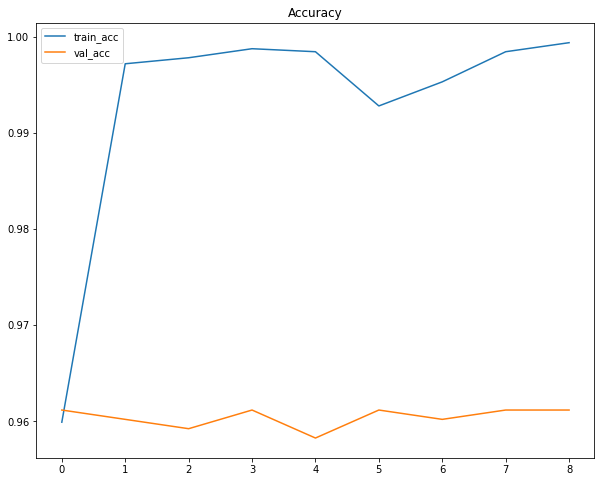

In [24]:
plt.figure(figsize = (10,8))
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.title("Accuracy")
plt.show()

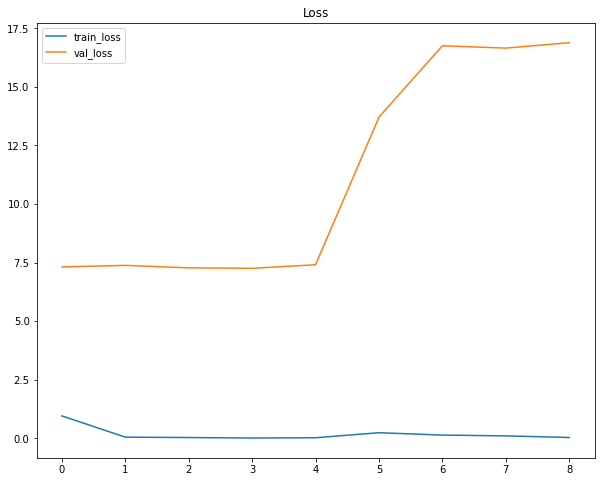

In [25]:
plt.figure(figsize = (10,8))
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.title("Loss")
plt.show()

In [26]:
model.evaluate(x_test, y_test, batch_size =32)

60/60 [==============================] - 25s 317ms/step - loss: 16.4664 - accuracy: 0.9558


[16.466381072998047, 0.9557894468307495]

In [27]:
y_pred = model.predict(x_test)

In [28]:
y_pred = np.argmax(y_pred, axis = 1)

In [29]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       959
           1       0.95      0.96      0.96       941

    accuracy                           0.96      1900
   macro avg       0.96      0.96      0.96      1900
weighted avg       0.96      0.96      0.96      1900



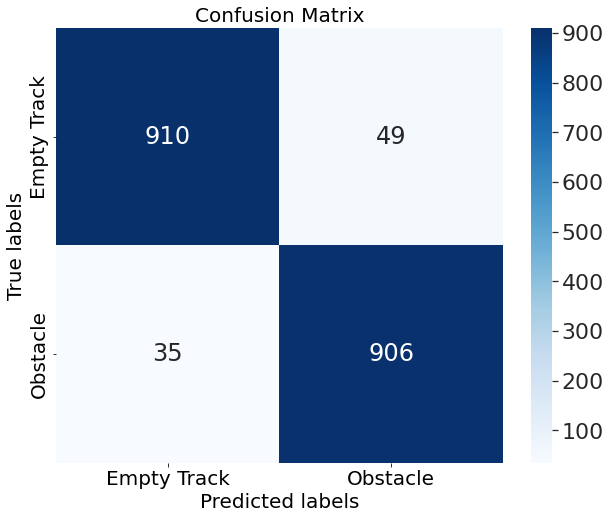

In [30]:
cm = confusion_matrix(y_pred,y_test)

plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20);ax.set_ylabel('True labels', fontsize=20); 
ax.set_title('Confusion Matrix', fontsize=20); 
ax.xaxis.set_ticklabels(['Empty Track', 'Obstacle'], fontsize=20); ax.yaxis.set_ticklabels(['Empty Track', 'Obstacle'], fontsize=20);

In [31]:
f1_score(y_test, y_pred, average='micro')

0.9557894736842105

In [32]:
recall_score(y_test, y_pred, average='weighted')

0.9557894736842105

In [33]:
precision_score(y_test, y_pred, average='micro')

0.9557894736842105